In [3]:
import os
import math
import requests
import numpy as np
import src.credentials as cred
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from src.questrade import QuestradeBot

# Personal Inputs

In [4]:
ACCOUNT_NUM = cred.QUESTRADE_ACCOUNT_NUM
QUESTRADE_TOKEN = cred.QUESTRADE_API_CODE

# QuestradeBot Initialization

In [5]:
qbot = QuestradeBot(QUESTRADE_TOKEN, ACCOUNT_NUM)

# Account Balance

In [6]:
balance = qbot.get_balance()
balance

,Cash,Market_Value,Total_Equity,Cash (%),Investment (%)
Currency,,,,,
CAD,31785.3365,0.00,31785.3365,100.00,0.00
USD,21744.9715,10307.18,32052.1515,67.84,32.16


# Portfolio Holdings

In [7]:
portfolio = qbot.get_investment_summary()
portfolio

,Description,Currency,Quantities,Market Value,Return (%),Portfolio (%)
MMM,3M COMPANY,USD,3,540.39,-8.51,5.24
O,REALTY INCOME CORP,USD,75,5075.25,10.57,49.23
JPM,JPMORGAN CHASE & CO.,USD,6,921.30,0.06,8.94
VTI,VANGUARD INDEX FUNDS VANGUARD TOTAL STOCK MARK...,USD,3,675.24,15.02,6.55
QQQ,INVESCO QQQ TRUST UNIT SER 1,USD,2,732.12,14.51,7.10
GLD,SPDR GOLD TRUST GOLD SHARES NPV,USD,7,1152.41,-5.55,11.18
TLT,ISHARES TRUST BARCLAYS 20+ TREAS BD FD TO 07/0...,USD,4,602.12,-0.75,5.84
IEF,ISHARES TRUST BARCLAYS 7-10 YEAR TREASURY BOND...,USD,5,584.65,-1.44,5.67


<AxesSubplot:title={'center':'Portfolio Breakdown'}, ylabel='Portfolio (%)'>

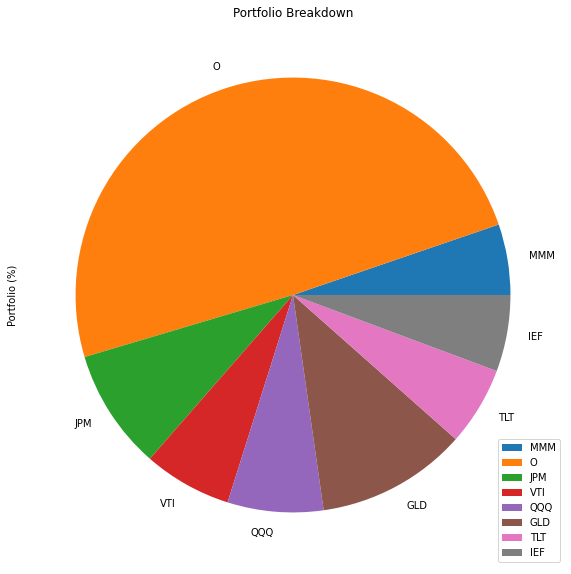

In [8]:
portfolio['Portfolio (%)'].plot(kind='pie',
                             title='Portfolio Breakdown',
                             figsize=(10, 10),
                             legend=True)

# Monthly Dividend Income

In [9]:
div = qbot.get_dividend_income()
div.loc['Total'] = div.sum(numeric_only=True, axis=0)

<AxesSubplot:title={'center':'Monthly Dividend Payments'}, xlabel='Months', ylabel='Dividend ($)'>

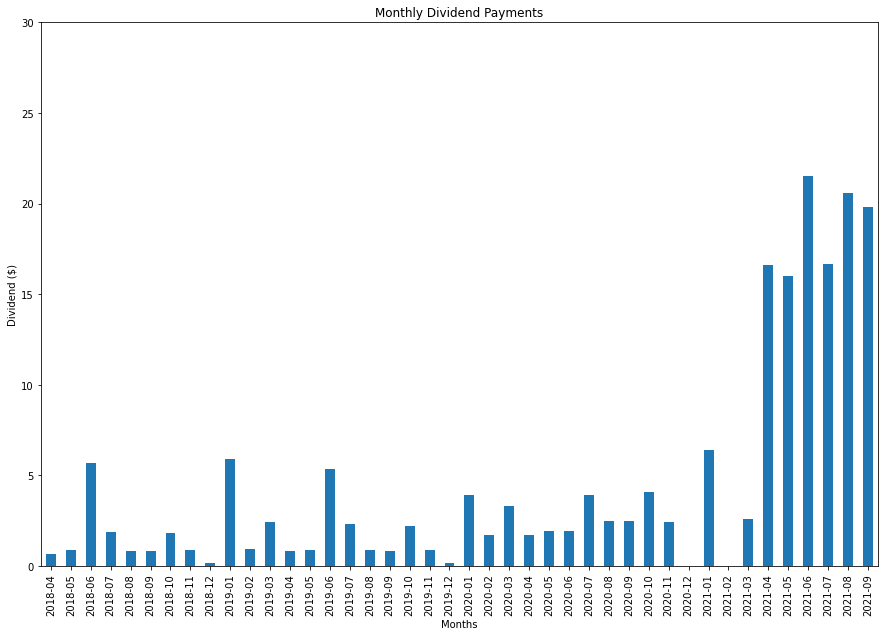

In [10]:
div[:-1].plot(kind='bar',
                    title='Monthly Dividend Payments',
                    xlabel='Months',
                    ylabel='Dividend ($)',
                    figsize=(15, 10),
                    legend=False,
                    ylim=(0, 30))

# Performance Against Benchmark